### No Show Appointments Dataset

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# PatientID should be int64
# ScheduledDay and AppointmentDay should be datetime.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
for i,v in enumerate(df.columns):
    print(i,v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [10]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
sum(df.duplicated())

0

In [12]:
df.iloc[:, 3:5] = df.iloc[:, 3:5].apply(pd.to_datetime, errors='coerce')

In [13]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date

In [14]:
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [15]:
df.iloc[:, 3:5] = df.iloc[:, 3:5].apply(pd.to_datetime, errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [17]:
df['PatientId'] = df['PatientId'].astype('int64')

In [18]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [20]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [21]:
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Disability'})

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [22]:
df['LeadTime'] = df['AppointmentDay'] - df['ScheduledDay']

In [23]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,LeadTime
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41 days
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41 days
110526,377511518121127,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,41 days


In [24]:
df['ScheduledDOW'] = df['ScheduledDay'].dt.weekday

In [25]:
df['AppointmentDOW'] = df['AppointmentDay'].dt.weekday

In [26]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
LeadTime             131
ScheduledDOW           6
AppointmentDOW         6
dtype: int64

In [27]:
df['ScheduledDOW'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: ScheduledDOW, dtype: int64

In [28]:
df['AppointmentDOW'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: AppointmentDOW, dtype: int64

In [29]:
df['LeadTime'].value_counts()

0 days      38563
2 days       6725
4 days       5290
1 days       5213
7 days       4906
            ...  
127 days        1
126 days        1
117 days        1
-6 days         1
125 days        1
Name: LeadTime, Length: 131, dtype: int64

In [30]:
df['LeadTime'] = df['LeadTime'].dt.days

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  LeadTime        110527 non-null  int

In [32]:
# checking for erroneous data
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hipertension.unique())#Hypertension
print('Handicap:',df.Handcap.unique())#Handicap
print('Scholarship:',df.Scholarship.unique())
print('SMS_received:',df.SMS_received.unique())
print('No-show:',df['No-show'].unique())
print('LeadTime:',sorted(df.LeadTime.unique()))
print('ScheduledDOW:',sorted(df.ScheduledDOW.unique()))
print('AppointmentDOW:',sorted(df.AppointmentDOW.unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No-show: ['No' 'Yes']
LeadTime: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 

# Exploring Visuals

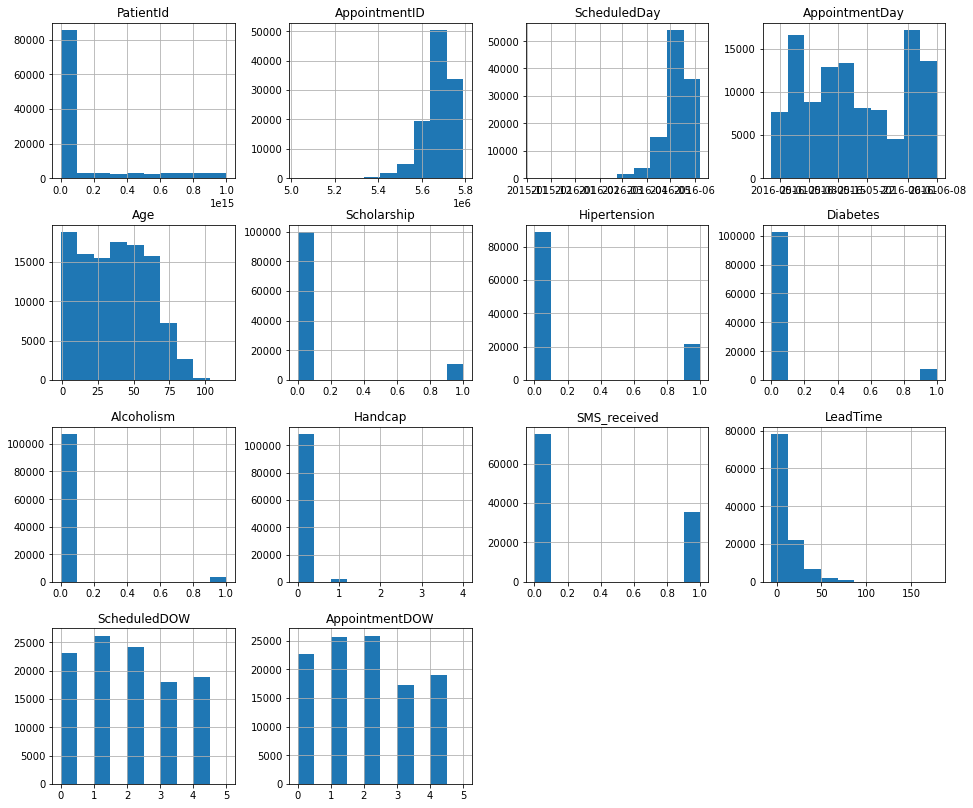

In [33]:
df.hist(figsize=(16,14));

# Analyzing Gender

In [34]:
# Group by gender and count the visits vs no-shows
gender_data = df.groupby('Gender')["No-show"].value_counts()
gender_data

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

Text(0, 0.5, 'Number of appointments')

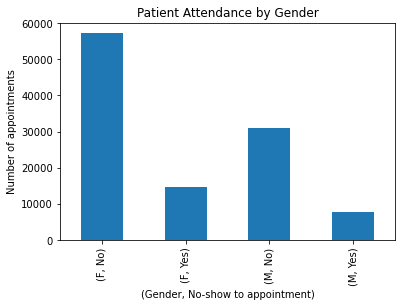

In [35]:
# plot the graph
gender_data.plot(kind='bar')
plt.title('Patient Attendance by Gender')
plt.xlabel('(Gender, No-show to appointment)')
plt.ylabel('Number of appointments')

## What is the age distirubtion of patients having various ailments and showed up versus those who did not show up?

In [41]:
df.groupby('No-show').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,LeadTime,ScheduledDOW,AppointmentDOW,no-show_numeric
No-show,,,,,,,,,,,,,
No,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,8.754659,1.847780,1.857439,0
Yes,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,15.831489,1.868453,1.861419,1


In [43]:
df['No-show'].value_counts(normalize=True)*100

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

In [38]:
df['no-show_numeric'] = np.where(df['No-show']=='Yes', 1, 0)

In [39]:
df[['Diabetes', 'no-show_numeric']].groupby(['Diabetes'], as_index=False).mean().sort_values(by='no-show_numeric', ascending=False)

,Diabetes,no-show_numeric
0,0,0.203628
1,1,0.180033


In [44]:
df[['Scholarship', 'no-show_numeric']].groupby(['Scholarship'], as_index=False).mean().sort_values(by='no-show_numeric', ascending=False)

,Scholarship,no-show_numeric
1,1,0.237363
0,0,0.198072


In [46]:
df[['Hipertension', 'no-show_numeric']].groupby(['Hipertension'], as_index=False).mean().sort_values(by='no-show_numeric', ascending=False)

,Hipertension,no-show_numeric
0,0,0.209037
1,1,0.173020


In [47]:
df[['Alcoholism', 'no-show_numeric']].groupby(['Alcoholism'], as_index=False).mean().sort_values(by='no-show_numeric', ascending=False)

,Alcoholism,no-show_numeric
0,0,0.201946
1,1,0.201488


In [48]:
df[['Handcap', 'no-show_numeric']].groupby(['Handcap'], as_index=False).mean().sort_values(by='no-show_numeric', ascending=False)

,Handcap,no-show_numeric
4,4,0.333333
3,3,0.230769
0,0,0.202353
2,2,0.202186
1,1,0.179236


In [53]:
df[['SMS_received', 'no-show_numeric']].groupby(['SMS_received'], as_index=False).mean().sort_values(by='no-show_numeric', ascending=False)

,SMS_received,no-show_numeric
1,1,0.275745
0,0,0.167033


In [52]:
df[['Gender', 'no-show_numeric']].groupby(['Gender'], as_index=False).mean().sort_values(by='no-show_numeric', ascending=False)

,Gender,no-show_numeric
0,F,0.203146
1,M,0.199679


## Age distribution of those with Y and whether they showed up

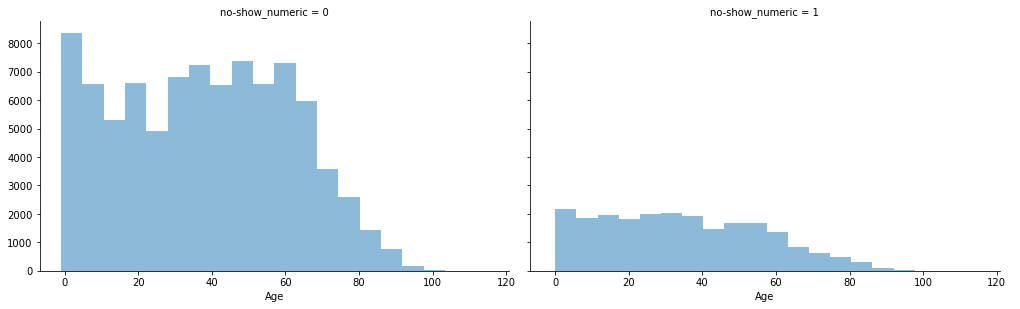

In [64]:
grid = sns.FacetGrid(df, col='no-show_numeric', height=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

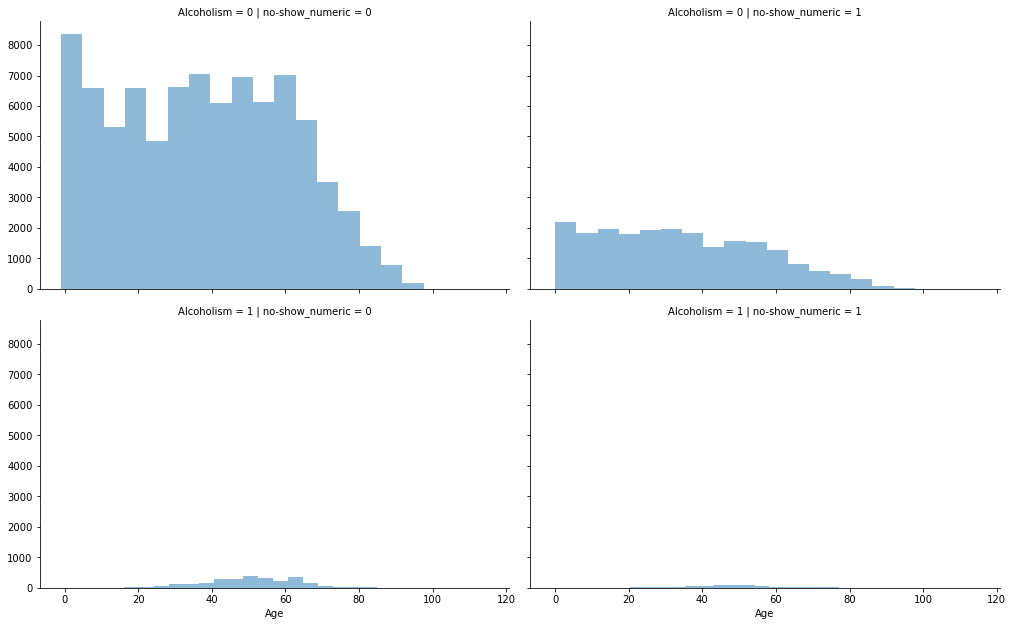

In [59]:
grid = sns.FacetGrid(df, col='no-show_numeric', row='Alcoholism', height=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

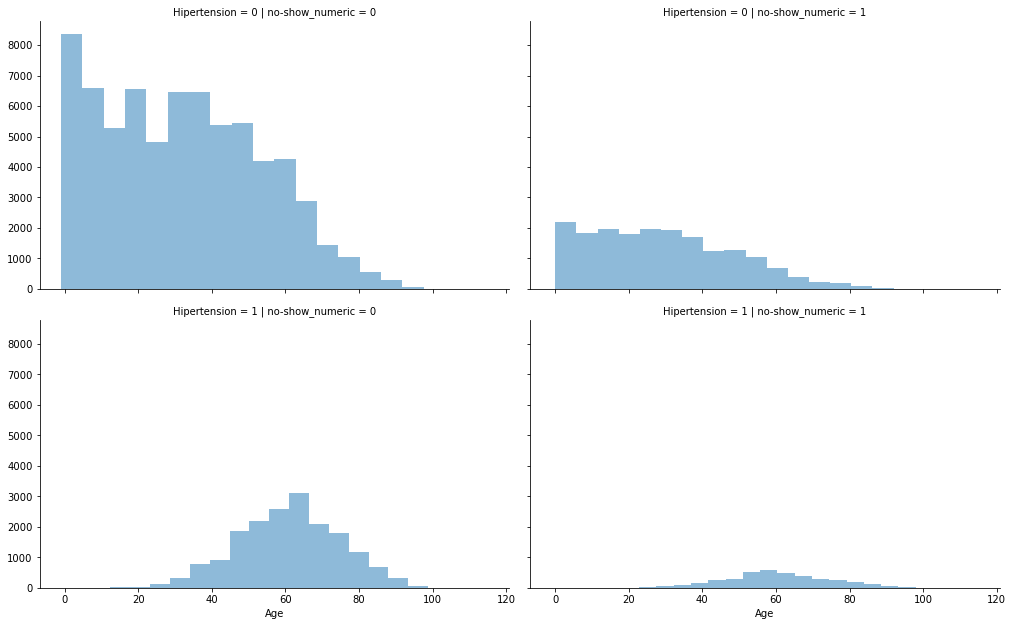

In [60]:
grid = sns.FacetGrid(df, col='no-show_numeric', row='Hipertension', height=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

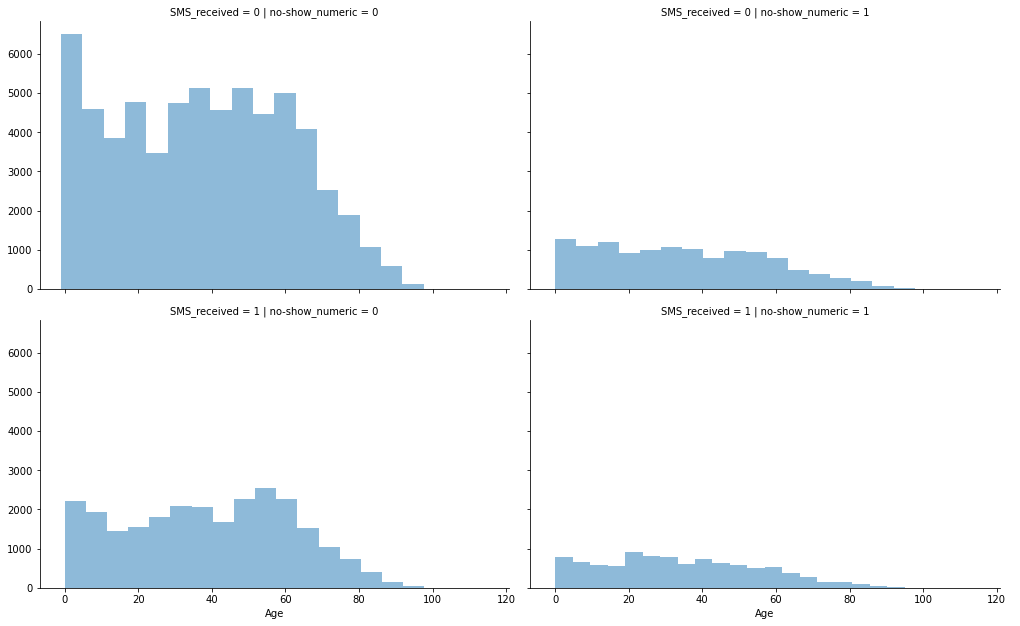

In [61]:
grid = sns.FacetGrid(df, col='no-show_numeric', row='SMS_received', height=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

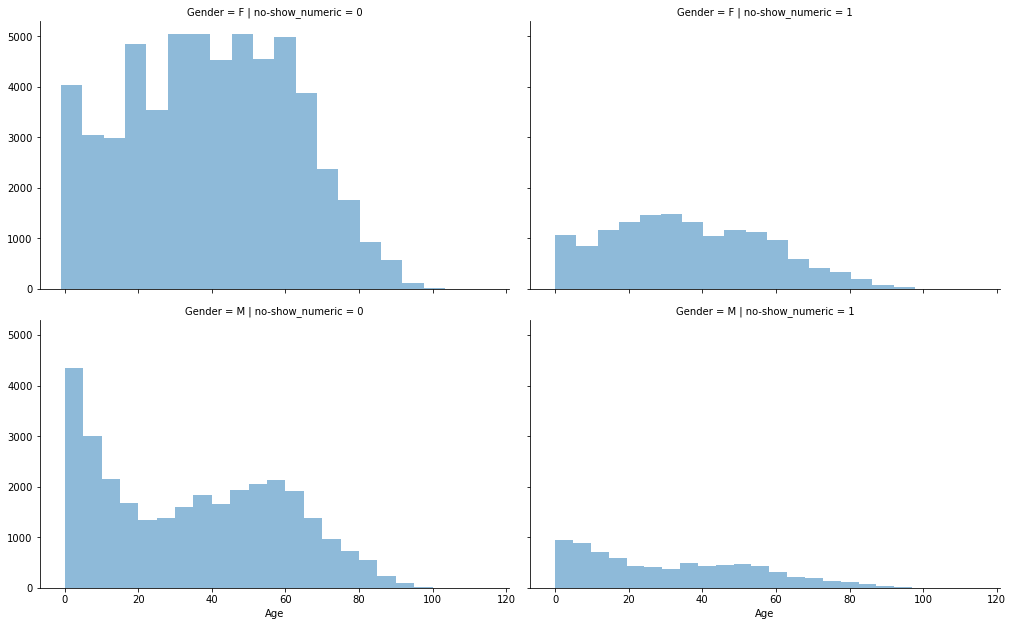

In [66]:
grid = sns.FacetGrid(df, col='no-show_numeric', row='Gender', height=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

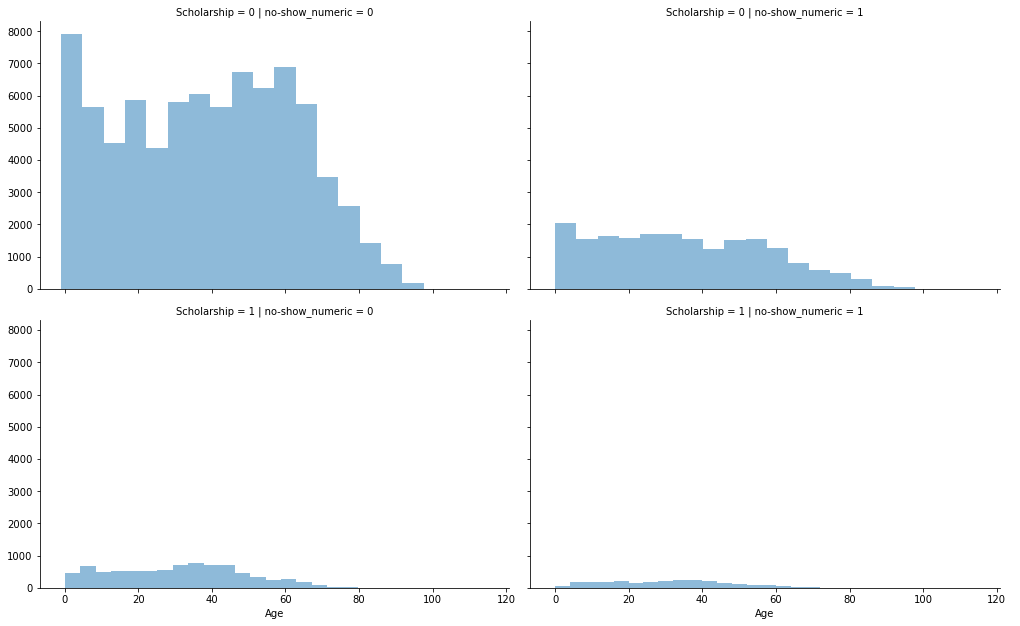

In [67]:
grid = sns.FacetGrid(df, col='no-show_numeric', row='Scholarship', height=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Conclusion:Interesting to look at the general age distribution in different way.  
Age distribution of those who showed vs didnt show.
And then compare that shape when other variables are introduced.
Factors like alcoholism and Hipertension seem to change the shape of the histogram.


## Looking at Lead Time

In [78]:
#Looking at the values in LeadTime
print('LeadTime:',sorted(df.LeadTime.unique()))

LeadTime: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


Text(0, 0.5, 'Number of patients')

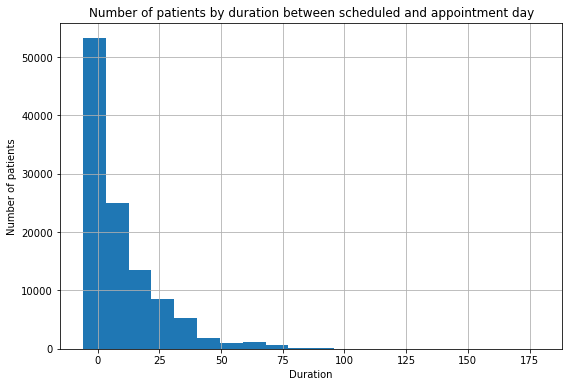

In [81]:
df.LeadTime.hist(bins =20, figsize = (9, 6));
plt.title('Number of patients by duration between scheduled and appointment day')
plt.xlabel('Duration')
plt.ylabel('Number of patients')

In [80]:
df.LeadTime.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: LeadTime, dtype: float64

In [87]:
# convert days into 4 stages and creat a new dataframe with columns in need.
bin_edges = [-7, 0, 4, 15, 180]
bin_names = ["Sameday", "2-4Days", "5-15Days", ">15Days"]
df['LeadTime_group'] = pd.cut(df['LeadTime'], bin_edges, labels = bin_names)
df_d = pd.concat([df.LeadTime, df.LeadTime_group, df['No-show']], axis =1)
df_d.shape

(110527, 3)

In [88]:
# calculate the number of total patients by duration group
df_d_g = df_d.groupby('LeadTime_group')['No-show'].count()
df_d_g

LeadTime_group
Sameday     38568
2-4Days     19965
5-15Days    25748
>15Days     26246
Name: No-show, dtype: int64